# PCA Assignment
1. Download the dataset faces.zip from Blackboard. It contains 2429 faces of
size 19 x 19 pixels each, and background.zip , containing background samples
somehow resembling faces. If there are any unreadable images, discard them.


#### Import dependencies

In [645]:
import numpy as np
from matplotlib import pyplot as plt
import os
from PIL import Image

#### Data loading functions

In [646]:
def vectorize_pgm(file_path):
    return np.asarray(Image.open(file_path)).ravel()

def load_images(directory):
    files = []
    for file in os.listdir(directory):
        files.append((vectorize_pgm(os.path.join(directory, file))))
    return np.asarray(files)

def get_faces():
    return load_images('data/faces/')

def get_backgrounds():
    return load_images('data/backgrounds/')

In [647]:
from sklearn.decomposition import PCA as skpca
def PCA(data):
    pca = skpca(None)
    other_result = pca.fit_transform(data)
    #plt.scatter(other_result[:,0], other_result[:,1], marker='.')
    #plt.show()
    # standardize data
    data = data.astype(np.float)
    data -= np.mean(data, axis=0)

    covariance = np.cov(data.T)
    values, vectors = np.linalg.eig(covariance)
    vectors = vectors[np.abs(values).argsort()[::-1]]
    num_pc = 2
    print("percent explained my pca", np.sum(values[:num_pc])/np.sum(values))
    print("percent explained sk pca", np.sum(pca.explained_variance_ratio_[:num_pc]))
    return values, vectors

a) Perform Principal Component Analysis on the faces. Discard the two largest
eigenvalue and plot the graph of the remaining eigenvalues sorted in decreasing
order. (1 point)

In [648]:
faces = get_faces()

In [649]:
values_faces, vectors_faces = PCA(faces)
values_faces, vectors_faces = PCA(faces)

percent explained my pca 0.6375949567047793
percent explained sk pca 0.6375949567047797
percent explained my pca 0.6375949567047793
percent explained sk pca 0.6375949567047797


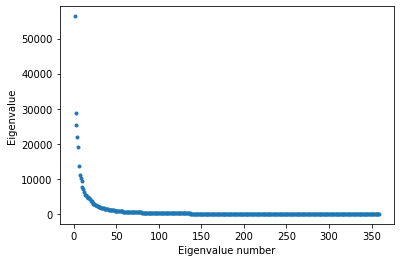

In [650]:

plt.scatter(np.arange(1,values_faces.size-1), values_faces[2:], marker='.')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue")
plt.show()

b) Plot a graph of the coordinates of the faces projected to the 2D plane generated
by the eigenvectors corresponding to the largest and second largest eigenvalues.
(1 point)

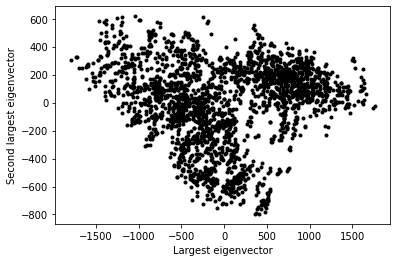

In [651]:
#values, vectors = PCA(faces)
data = faces.astype(np.float)
data -= np.mean(faces, axis=0)
result = vectors_faces.T.dot(data.T)
plt.scatter(result[0], result[1], marker='.', color='black')
plt.xlabel("Largest eigenvector")
plt.ylabel("Second largest eigenvector")
plt.show()


c) On the same graph, display the coordinates of the projections from b) using one
color (black) and the projections of the background patches on the same two
eigenvectors using another color (e.g. red or light gray). Be sure to subtract the
mean of the faces and project to the eigenvectors of the faces. (1 point)

In [652]:
backgrounds = get_backgrounds()
values_backgrounds, vectors_backgrounds= PCA(backgrounds)

percent explained my pca 0.5966636028270527
percent explained sk pca 0.5966636028270529


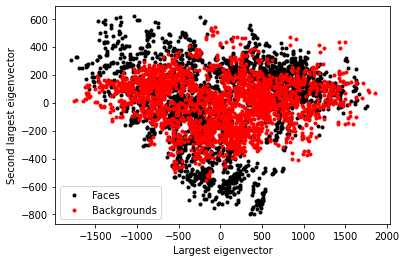

In [653]:
plt.xlabel("Largest eigenvector")
plt.ylabel("Second largest eigenvector")

#values, vectors = PCA(faces)
data = faces.astype(np.float)
data -= np.mean(faces, axis=0)
result = vectors_faces.T.dot(data.T)
plt.scatter(result[0], result[1], marker='.', color='black')

data = faces.astype(np.float)
data -= np.mean(faces, axis=0)
result = vectors_backgrounds.T.dot(data.T)
plt.scatter(result[0], result[1], marker='.', color='red')

plt.legend(["Faces", "Backgrounds"])
plt.show()

d) Compute the distances of the faces and the background points to the plane from
b). On the same graph, plot the computed distances (on the y-axis) vs the coordinates of the
projections on the eigenvector of the largest eigenvalue (on the xaxis) for the faces and
background patches using two different colors. (2 points)

In [674]:
def calc_distance_from_plane(values):
    plane = np.zeros_like(values)
    plane[:2] = values[:2]
    return np.linalg.norm(plane-values, axis=0)

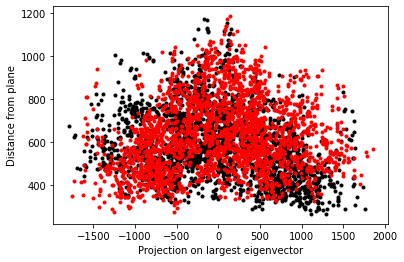

In [673]:
result = vectors_faces.T.dot(data.T)
distances = calc_distance_from_plane(result)
plt.scatter(result[0], distances, marker='.', color='black')

result = vectors_backgrounds.T.dot(data.T)
distances = calc_distance_from_plane(result)
plt.scatter(result[0], distances, marker='.', color='red')

plt.xlabel('Projection on largest eigenvector')
plt.ylabel('Distance from plane')
plt.show()

e) Repeat point d) displaying the computed distances (on y) vs the coordinates of
the projections on the eigenvector of the second largest eigenvalue(on x). (2
points)

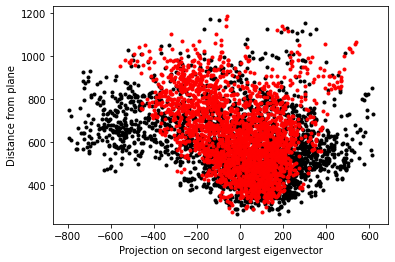

In [676]:
result = vectors_faces.T.dot(data.T)
distances = calc_distance_from_plane(result)
plt.scatter(result[1], distances, marker='.', color='black')

result = vectors_backgrounds.T.dot(data.T)
distances = calc_distance_from_plane(result)
plt.scatter(result[1], distances, marker='.', color='red')

plt.xlabel('Projection on second largest eigenvector')
plt.ylabel('Distance from plane')
plt.show()